In [51]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 30)

import numpy as np
import json
import pprint
import urllib.request
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('911_Finance_Data.csv')

In [3]:
df

,_id,ETSB Name,Report Year,Population,Contact,Contact Email,Contact Phone,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Local Funds,Grant Funds,Interest Income,Contractual Services Revenue,Other Revenue,...,Translation,Contract Fees to Other 9-1-1,Other Professional Services,State Consol. Grant Funds,Remaining Cash Balance,Vehicle,Mobile Data Terminals,Software Licenses,Voice/Data Logging Recorder,Other Personnel Cost,Radio Ciruits,Conferences,Certifications,Public Education,Mapping/Addressing/GIS Professional Services
0,1,Zion E9-1-1 ETSB,2014,"24,413",John Lewis,johnl@zion.il.us,847-746-4042,"109,156.00","54,680.00",0.00,0.00,0.00,0.00,0.00,"25,389.00",...,0.00,0.00,"5,951.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,Zion E9-1-1 ETSB,2015,"24,413",John Lewis,johnl@zion.il.us,847.746.4042,"108,526.00","54,364.00",0.00,0.00,0.00,0.00,0.00,"40,151.00",...,0.00,0.00,"4,571.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,Zion E9-1-1 ETSB,2016,"24,413",(*blank*),johnl@zion.il.us,(*blank*),"117,555.00","58,866.00",0.00,0.00,0.00,0.00,0.00,"34,051.00",...,0.00,"1,095.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,Adams County 9-1-1,2013,"67,103",Steve Rowlands,srowlands@co.adams.il.us,(217) 228-4572,"401,537.91",0.00,0.00,"1,241,075.60",0.00,"3,919.89",0.00,0.00,...,36.75,0.00,"2,854.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Adams County 9-1-1,2014,"67,103",Steve Rowlands,srowlands@co.adams.il.us,(217) 228-4572,"366,717.81",0.00,0.00,"1,273,932.43","1,000.00","3,421.27",0.00,40.55,...,62.57,0.00,"1,884.82",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,1385,Woodford County ETSB,2017,"35,833",Betsy Tipsword,btipsword@woodford-county.org,309-467-2375,"420,000.00",NaN,NaN,"497,206.00",0.00,"3,133.00",0.00,0.00,...,0.00,0.00,"8,612.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1385,1386,Woodford County ETSB,2018,"35,833",Betsy Tipsword,btipsword@woodford-county.org,309-467-7225,"608,635.00",NaN,NaN,0.00,0.00,"7,959.56","546,410.00",0.00,...,0.00,0.00,0.00,0.00,"1,049,510.69",0.00,0.00,0.00,900.00,"2,500.00",0.00,0.00,250.00,0.00,0.00
1386,1387,Woodford County ETSB,2019,"35,833",Betsy Tipsword,btipsword@woodford-county.org,309-467-7225,"656,291.24",0.00,0.00,0.00,0.00,"11,499.00","560,326.00",0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"27,260.00",0.00,0.00,315.00,0.00,0.00,0.00
1387,1388,Woodford County ETSB,2020,"38,664",Betsy Tipsword,btipsword@woodford-county.org,309-467-7225,"676,234.00",0.00,0.00,0.00,0.00,"3,732.31","505,025.00",0.00,...,0.00,0.00,0.00,0.00,"1,235,577.00",0.00,0.00,0.00,0.00,"2,500.00",0.00,0.00,0.00,0.00,0.00


In [4]:
surcharges = ['Illinois Surcharge', 'Wireline Surcharge','VoIP Surcharge']

In [6]:
df[surcharges]. describe()

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
count,"1,373.00","1,371.00","1,372.00"
mean,"901,650.61","196,209.14","14,564.54"
std,"5,570,305.48","1,861,047.26","65,779.06"
min,0.00,0.00,0.00
25%,"89,030.00",0.00,0.00
50%,"223,567.00","23,423.00",0.00
75%,"578,475.00","113,767.57",330.00
max,"152,975,255.00","40,954,088.00","845,674.35"


In [8]:
df.isnull()

,_id,ETSB Name,Report Year,Population,Contact,Contact Email,Contact Phone,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Local Funds,Grant Funds,Interest Income,Contractual Services Revenue,Other Revenue,...,Translation,Contract Fees to Other 9-1-1,Other Professional Services,State Consol. Grant Funds,Remaining Cash Balance,Vehicle,Mobile Data Terminals,Software Licenses,Voice/Data Logging Recorder,Other Personnel Cost,Radio Ciruits,Conferences,Certifications,Public Education,Mapping/Addressing/GIS Professional Services
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1385,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
Counts_X = df.isnull().sum(axis=0)
Counts_X 

_id                                             0
ETSB Name                                       0
Report Year                                     0
Population                                      0
Contact                                         0
                                               ..
Radio Ciruits                                   0
Conferences                                     0
Certifications                                  0
Public Education                                0
Mapping/Addressing/GIS Professional Services    0
Length: 64, dtype: int64

In [11]:
Counts_Y = df.isnull().sum(axis=1)
Counts_Y

0       0
1       0
2       0
3       0
4       0
       ..
1384    2
1385    2
1386    0
1387    0
1388    0
Length: 1389, dtype: int64

In [13]:
surchage_missing = df[surcharges].isnull().sum(axis=1)
surchage_missing

0       0
1       0
2       0
3       0
4       0
       ..
1384    2
1385    2
1386    0
1387    0
1388    0
Length: 1389, dtype: int64

In [16]:
# Display 20 quantiles for the "Surcharge" columns, from 0% to 100% in steps of 5%..
df[surcharges].quantile(np.arange(0, 1, 0.05))

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00
0.10,"18,133.50",0.00,0.00
0.15,"52,237.80",0.00,0.00
0.20,"69,808.18",0.00,0.00
0.25,"89,030.00",0.00,0.00
0.30,"103,602.04",0.00,0.00
0.35,"129,042.26",0.00,0.00
0.40,"160,076.00",0.00,0.00
0.45,"191,980.84","6,617.00",0.00


In [27]:
conda install statsmodels

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\EzekielJoaquim\anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py38haa95532_0        14.5 MB
    ------------------------------------------------------------
                                           Total:        14.5 MB

The following packages will be UPDATED:

  conda              conda-forge::conda-4.11.0-py38haa244f~ --> pkgs/main::conda-4.12.0-py38haa95532_0




conda-4.12.0         | 14.5 MB   |            |   0% 
conda-4.12.0         | 14.5 MB   |            |   0% 
conda-4.12.0         | 14.5 MB   |            |   0% 
conda-4.12.0         | 14.5 MB   |            |   1% 
conda-4.12.0         | 14.5 MB   | 1          |   2% 
conda-4.12.0         | 14.5 MB   | 2          |   2% 
conda-4.12.0         | 

In [28]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqline
import scipy.stats as scistat

In [29]:
surchargeonly = df.loc[:, surcharges]

In [30]:
surchargeonly

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
_id,,,
1,"109,156.00","54,680.00",0.00
2,"108,526.00","54,364.00",0.00
3,"117,555.00","58,866.00",0.00
4,"401,537.91",0.00,0.00
5,"366,717.81",0.00,0.00
...,...,...,...
1385,"420,000.00",NaN,NaN
1386,"608,635.00",NaN,NaN
1387,"656,291.24",0.00,0.00


In [31]:
surchargeonly.describe()

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge
count,"1,373.00","1,371.00","1,372.00"
mean,"901,650.61","196,209.14","14,564.54"
std,"5,570,305.48","1,861,047.26","65,779.06"
min,0.00,0.00,0.00
25%,"89,030.00",0.00,0.00
50%,"223,567.00","23,423.00",0.00
75%,"578,475.00","113,767.57",330.00
max,"152,975,255.00","40,954,088.00","845,674.35"


In [32]:
surchargeonly.skew()

Illinois Surcharge   19.89
Wireline Surcharge   18.55
VoIP Surcharge        8.23
dtype: float64

In [33]:
# TEST FOR NORMALITY

def testnorm(var, df):
    stat, p = scistat.shapiro(df[var])
    return p

In [34]:
testnorm("Illinois Surcharge", surchargeonly)

1.0

In [35]:
testnorm("Wireline Surcharge", surchargeonly)

1.0

In [36]:
testnorm("VoIP Surcharge", surchargeonly)

1.0

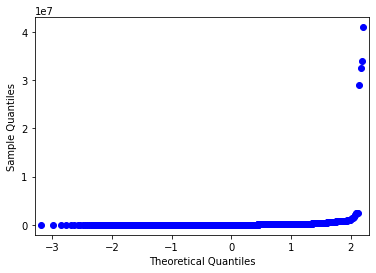

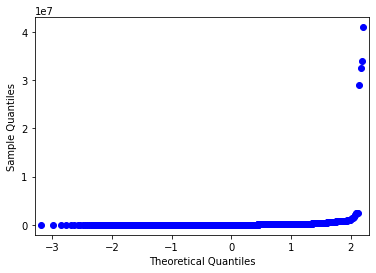

In [37]:
# Using the Inter-Quartile Ranges, find all outliers in all numeric columns. Show the rows containing outliers, along with the variable (column) name (for each row) that had the outlier value.
sm.qqplot(surchargeonly[['Wireline Surcharge']].sort_values(['Wireline Surcharge']), line='s')

In [38]:
# B/c not Normal, use IQR for outliers
thirdQ = surchargeonly['Wireline Surcharge'].quantile(0.75)
firstQ = surchargeonly['Wireline Surcharge'].quantile(0.25)

outlierRange = 1.5*(thirdQ - firstQ)

In [39]:
outlierHigh = thirdQ + outlierRange

In [40]:
outlierHigh

284418.92500000005

In [41]:
lowoutlier = firstQ - outlierRange

In [43]:
lowoutlier
df

-170651.355

,ETSB Name,Report Year,Population,Contact,Contact Email,Contact Phone,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Local Funds,Grant Funds,Interest Income,Contractual Services Revenue,Other Revenue,BOY Reserve Balance,...,Translation,Contract Fees to Other 9-1-1,Other Professional Services,State Consol. Grant Funds,Remaining Cash Balance,Vehicle,Mobile Data Terminals,Software Licenses,Voice/Data Logging Recorder,Other Personnel Cost,Radio Ciruits,Conferences,Certifications,Public Education,Mapping/Addressing/GIS Professional Services
_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Zion E9-1-1 ETSB,2014,"24,413",John Lewis,johnl@zion.il.us,847-746-4042,"109,156.00","54,680.00",0.00,0.00,0.00,0.00,0.00,"25,389.00","-184,531.00",...,0.00,0.00,"5,951.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Zion E9-1-1 ETSB,2015,"24,413",John Lewis,johnl@zion.il.us,847.746.4042,"108,526.00","54,364.00",0.00,0.00,0.00,0.00,0.00,"40,151.00","-128,411.00",...,0.00,0.00,"4,571.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Zion E9-1-1 ETSB,2016,"24,413",(*blank*),johnl@zion.il.us,(*blank*),"117,555.00","58,866.00",0.00,0.00,0.00,0.00,0.00,"34,051.00","-54,972.00",...,0.00,"1,095.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Adams County 9-1-1,2013,"67,103",Steve Rowlands,srowlands@co.adams.il.us,(217) 228-4572,"401,537.91",0.00,0.00,"1,241,075.60",0.00,"3,919.89",0.00,0.00,"502,223.00",...,36.75,0.00,"2,854.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Adams County 9-1-1,2014,"67,103",Steve Rowlands,srowlands@co.adams.il.us,(217) 228-4572,"366,717.81",0.00,0.00,"1,273,932.43","1,000.00","3,421.27",0.00,40.55,"714,029.00",...,62.57,0.00,"1,884.82",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Woodford County ETSB,2017,"35,833",Betsy Tipsword,btipsword@woodford-county.org,309-467-2375,"420,000.00",NaN,NaN,"497,206.00",0.00,"3,133.00",0.00,0.00,"894,410.00",...,0.00,0.00,"8,612.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1386,Woodford County ETSB,2018,"35,833",Betsy Tipsword,btipsword@woodford-county.org,309-467-7225,"608,635.00",NaN,NaN,0.00,0.00,"7,959.56","546,410.00",0.00,0.00,...,0.00,0.00,0.00,0.00,"1,049,510.69",0.00,0.00,0.00,900.00,"2,500.00",0.00,0.00,250.00,0.00,0.00
1387,Woodford County ETSB,2019,"35,833",Betsy Tipsword,btipsword@woodford-county.org,309-467-7225,"656,291.24",0.00,0.00,0.00,0.00,"11,499.00","560,326.00",0.00,"1,293,151.26",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"27,260.00",0.00,0.00,315.00,0.00,0.00,0.00


In [46]:
# Select all columns with numeric data types
numberonly = df.select_dtypes(include=["number"])

In [47]:
def getOuliers():
    dfOut = pd.DataFrame(columns=numberonly.columns, data=None)
    
    for col in numberonly.columns[1:]:
        thirdQ = numberonly[col].quantile(0.75)
        firstQ = numberonly[col].quantile(0.25)
        outlierRange = 1.5*(thirdQ - firstQ)
        lowOutlier = firstQ - outlierRange
        highOutlier = thirdQ + outlierRange
        
        df1 = numberonly.loc[(numberonly[col] > highOutlier) | (numberonly[col] < lowOutlier)]
        
        df1= df.assign(varname = col, threshlow = lowOutlier, threshhigh = highOutlier)
        
        dfOut = pd.concat([dfOut, df1])
    
    return dfOut
        

In [48]:
outliers = getOuliers()
outliers

,Report Year,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Local Funds,Grant Funds,Interest Income,Contractual Services Revenue,Other Revenue,BOY Reserve Balance,Expenses Not Classified Above,Operating Expenses,Primary PSAPS,Secondary PSAPS,Infrastructure,...,Voice/Data Logging Recorder,Other Personnel Cost,Radio Ciruits,Conferences,Certifications,Public Education,Mapping/Addressing/GIS Professional Services,ETSB Name,Population,Contact,Contact Email,Contact Phone,varname,threshlow,threshhigh
1,2014,"109,156.00","54,680.00",0.00,0.00,0.00,0.00,0.00,"25,389.00","-184,531.00",0.00,0.00,1,0,"5,571.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Zion E9-1-1 ETSB,"24,413",John Lewis,johnl@zion.il.us,847-746-4042,Illinois Surcharge,"-645,137.50","1,312,642.50"
2,2015,"108,526.00","54,364.00",0.00,0.00,0.00,0.00,0.00,"40,151.00","-128,411.00",0.00,0.00,1,0,"4,006.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Zion E9-1-1 ETSB,"24,413",John Lewis,johnl@zion.il.us,847.746.4042,Illinois Surcharge,"-645,137.50","1,312,642.50"
3,2016,"117,555.00","58,866.00",0.00,0.00,0.00,0.00,0.00,"34,051.00","-54,972.00",0.00,0.00,1,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Zion E9-1-1 ETSB,"24,413",(*blank*),johnl@zion.il.us,(*blank*),Illinois Surcharge,"-645,137.50","1,312,642.50"
4,2013,"401,537.91",0.00,0.00,"1,241,075.60",0.00,"3,919.89",0.00,0.00,"502,223.00","16,266.20","9,599.00",1,0,"9,820.21",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Adams County 9-1-1,"67,103",Steve Rowlands,srowlands@co.adams.il.us,(217) 228-4572,Illinois Surcharge,"-645,137.50","1,312,642.50"
5,2014,"366,717.81",0.00,0.00,"1,273,932.43","1,000.00","3,421.27",0.00,40.55,"714,029.00","19,587.28","9,599.00",1,0,"10,965.47",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Adams County 9-1-1,"67,103",Steve Rowlands,srowlands@co.adams.il.us,(217) 228-4572,Illinois Surcharge,"-645,137.50","1,312,642.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,2017,"420,000.00",NaN,NaN,"497,206.00",0.00,"3,133.00",0.00,0.00,"894,410.00","1,521.00",0.00,1,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Woodford County ETSB,"35,833",Betsy Tipsword,btipsword@woodford-county.org,309-467-2375,Mapping/Addressing/GIS Professional Services,0.00,0.00
1386,2018,"608,635.00",NaN,NaN,0.00,0.00,"7,959.56","546,410.00",0.00,0.00,0.00,0.00,1,0,0.00,...,900.00,"2,500.00",0.00,0.00,250.00,0.00,0.00,Woodford County ETSB,"35,833",Betsy Tipsword,btipsword@woodford-county.org,309-467-7225,Mapping/Addressing/GIS Professional Services,0.00,0.00
1387,2019,"656,291.24",0.00,0.00,0.00,0.00,"11,499.00","560,326.00",0.00,"1,293,151.26",0.00,0.00,1,0,0.00,...,"27,260.00",0.00,0.00,315.00,0.00,0.00,0.00,Woodford County ETSB,"35,833",Betsy Tipsword,btipsword@woodford-county.org,309-467-7225,Mapping/Addressing/GIS Professional Services,0.00,0.00
1388,2020,"676,234.00",0.00,0.00,0.00,0.00,"3,732.31","505,025.00",0.00,0.00,0.00,0.00,1,1,"204,600.00",...,0.00,"2,500.00",0.00,0.00,0.00,0.00,0.00,Woodford County ETSB,"38,664",Betsy Tipsword,btipsword@woodford-county.org,309-467-7225,Mapping/Addressing/GIS Professional Services,0.00,0.00


In [49]:
# Make a histogram for the "Illinois Surcharge" column. Make sure to use appropriate number of bins and appropriate histogram labels.

surlogs = surchargeonly.copy()
for col in surchargeonly.columns[1:]:
        surlogs[col] = np.log1p(surlogs[col])

(array([1.368e+03, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 1.52975255e+07, 3.05950510e+07, 4.58925765e+07,
        6.11901020e+07, 7.64876275e+07, 9.17851530e+07, 1.07082678e+08,
        1.22380204e+08, 1.37677730e+08, 1.52975255e+08]),
 <BarContainer object of 10 artists>)

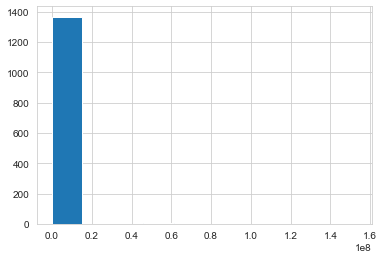

In [53]:
plt.hist(surlogs["Illinois Surcharge" ], bins=10)

In [54]:
numberonly.corr()

,Report Year,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Local Funds,Grant Funds,Interest Income,Contractual Services Revenue,Other Revenue,BOY Reserve Balance,Expenses Not Classified Above,Operating Expenses,Primary PSAPS,Secondary PSAPS,Infrastructure,...,Translation,Contract Fees to Other 9-1-1,Other Professional Services,State Consol. Grant Funds,Remaining Cash Balance,Vehicle,Mobile Data Terminals,Software Licenses,Voice/Data Logging Recorder,Other Personnel Cost,Radio Ciruits,Conferences,Certifications,Public Education,Mapping/Addressing/GIS Professional Services
Report Year,1.00,0.06,-0.08,-0.15,0.10,0.12,0.19,0.03,0.06,-0.01,-0.09,0.07,-0.02,-0.05,0.04,...,0.01,-0.01,0.07,0.15,0.33,0.10,0.15,0.20,0.23,0.09,0.17,0.21,0.26,0.15,0.19
Illinois Surcharge,0.06,1.00,0.64,0.03,0.00,0.01,0.12,0.00,0.04,-0.81,0.42,0.71,0.05,0.01,0.80,...,0.79,0.02,0.33,0.04,0.37,0.69,0.20,0.19,0.06,0.73,0.06,0.14,0.00,0.07,0.04
Wireline Surcharge,-0.08,0.64,1.00,0.04,-0.02,-0.02,-0.01,-0.01,0.04,-0.52,0.66,-0.01,0.02,0.02,0.17,...,0.58,-0.01,0.11,-0.01,-0.03,-0.01,-0.01,-0.02,-0.02,-0.01,-0.02,-0.02,-0.02,-0.01,-0.02
VoIP Surcharge,-0.15,0.03,0.04,1.00,0.02,-0.02,0.01,-0.02,0.09,0.14,0.10,-0.00,0.29,0.24,0.06,...,0.04,-0.01,0.04,-0.03,-0.06,-0.02,-0.03,-0.04,-0.05,-0.02,-0.04,-0.05,-0.05,-0.03,-0.03
Local Funds,0.10,0.00,-0.02,0.02,1.00,0.10,-0.01,0.04,0.00,-0.00,-0.00,0.01,-0.04,-0.02,0.03,...,-0.00,0.11,0.02,0.06,0.03,-0.02,-0.01,0.06,0.03,0.05,0.28,0.00,-0.03,0.01,-0.01
Grant Funds,0.12,0.01,-0.02,-0.02,0.10,1.00,0.05,0.04,0.09,0.02,-0.01,0.03,-0.01,-0.01,0.01,...,-0.01,-0.04,0.01,0.03,0.13,0.06,0.16,0.08,0.11,0.03,0.11,0.04,0.02,0.03,0.06
Interest Income,0.19,0.12,-0.01,0.01,-0.01,0.05,1.00,0.05,0.02,0.18,-0.01,0.13,0.34,-0.01,0.02,...,0.03,0.07,0.04,0.12,0.43,0.03,0.12,0.26,0.16,0.00,0.20,0.34,0.13,0.09,0.07
Contractual Services Revenue,0.03,0.00,-0.01,-0.02,0.04,0.04,0.05,1.00,0.09,0.03,-0.01,0.06,-0.00,-0.01,0.02,...,-0.01,0.02,0.04,0.02,0.04,-0.01,-0.01,0.24,0.05,0.00,0.02,0.02,0.00,-0.01,-0.01
Other Revenue,0.06,0.04,0.04,0.09,0.00,0.09,0.02,0.09,1.00,0.04,0.05,0.01,0.04,-0.01,0.02,...,0.02,0.02,0.01,-0.01,0.13,0.01,0.03,0.06,0.06,0.03,0.11,0.08,-0.01,0.06,0.02
BOY Reserve Balance,-0.01,-0.81,-0.52,0.14,-0.00,0.02,0.18,0.03,0.04,1.00,-0.14,-0.59,0.14,0.04,-0.73,...,-0.79,0.02,-0.28,0.02,-0.27,-0.62,-0.14,-0.05,0.08,-0.67,0.05,0.03,0.01,0.01,0.01


In [61]:
fivenumbers = ['Illinois Surcharge', 'Wireline Surcharge', 'VoIP Surcharge','Local Funds', 'Grant Funds']

In [65]:
fivenumberonly = df.loc[:,fivenumbers]
fivenumberonly.corr()

,Illinois Surcharge,Wireline Surcharge,VoIP Surcharge,Local Funds,Grant Funds
Illinois Surcharge,1.00,0.64,0.03,0.00,0.01
Wireline Surcharge,0.64,1.00,0.04,-0.02,-0.02
VoIP Surcharge,0.03,0.04,1.00,0.02,-0.02
Local Funds,0.00,-0.02,0.02,1.00,0.10
Grant Funds,0.01,-0.02,-0.02,0.10,1.00
